In [1]:
# HIDDEN
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
from scipy import stats

## Examples ##

This section is a workout in finding expectation and variance by conditioning. As before, if you are trying to find a probability, expectation, or variance, and you think, "If only I knew the value of this other random variable, I'd have the answer," then that's a sign that you should consider conditioning on that other random variable.

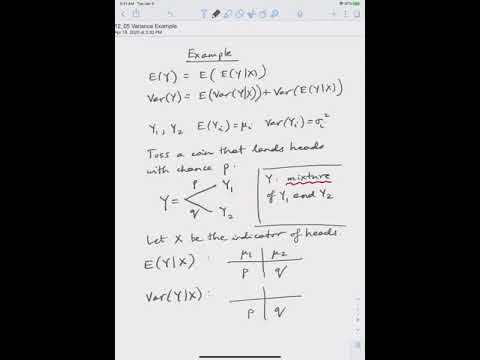

In [2]:
# VIDEO: A Mixture
from IPython.display import YouTubeVideo

YouTubeVideo('-uYGQrQCXzM')

### Mixture of Two Distributions ###
Let $X$ have mean $\mu_X$ and SD $\sigma_X$. Let $Y$ have mean $\mu_Y$ and SD $\sigma_Y$. Now let $p$ be a number between 0 and 1, and define the random variable $M$ as follows.

$$
M = 
\begin{cases}
X ~~ \text{with probability } p \\
Y ~~ \text{with probability } q = 1 - p \\
\end{cases}
$$

The distribution of $M$ is called a *mixture* of the distributions of $X$ and $Y$.

One way to express the definition of $M$ compactly is to let $I_H$ be the indicator of heads in one toss of a $p$-coin; then

$$
M = XI_H + Y(1 - I_H)
$$

To find the expectation of $M$ we can use the expression above, but here we will condition on $I_H$ because we can continue with that method to find $Var(M)$. 

The distribution table of the random variable $E(M \mid I_H)$ is

|**Value**| $\mu_X$ | $\mu_Y$|
|---------|---------|--------|
|**Probability**| $p$ | $q$ |

The distribution table of the random variable $Var(M \mid I_H)$ is

|**Value**| $\sigma_X^2$ | $\sigma_Y^2$|
|---------|---------|--------|
|**Probability**| $p$ | $q$ |

So

$$
E(M) ~ = ~ E(E(M \mid I_H)) ~ = ~ \mu_Xp + \mu_Yq
$$

and

$$
\begin{align*}
Var(M) ~ &= ~ E(Var(M \mid I_H)) + Var(E(M \mid I_H)) \\
&= ~ \big{(} \sigma_X^2p + \sigma_Y^2q \big{)}  + \big{(} \mu_X^2p + \mu_Y^2q - (E(M))^2 \big{)}
\end{align*}
$$

This is true no matter what the distributions of $X$ and $Y$ are.

### Variance of the Geometric Distribution ###
We have managed to come quite far into the course without deriving the variance of the geometric distribution. Let's find it now by using the results about mixtures derived above.

Toss a coin that lands heads with probability $p$ and stop when you see a head. The number of tosses $X$ has the geometric $(p)$ distribution on $\{ 1, 2, \ldots \}$. Let $E(X) = \mu$ and $Var(X) = \sigma^2$. We will use conditioning to confirm that $E(X) = 1/p$ and also to find $Var(X)$.

Now

$$
X = 
\begin{cases} 
1 ~~~ \text{with probability } p \\
1 + X^* ~~~ \text{with probability } q = 1-p
\end{cases}
$$

where $X^*$ is an independent copy of $X$. By the previous example,

$$
\mu ~ = ~ E(X) ~ = ~ 1p + (1+\mu)q
$$

So $\mu = 1/p$ as we have known for some time.

By the variance formula of the previous example,

$$
\sigma^2 = Var(X) = \big{(} 0^2p + \sigma^2q \big{)} + \big{(}1^2p + (1+\frac{1}{p})^2q - \frac{1}{p^2}\big{)}
$$

So

$$
\sigma^2p ~ = ~ \frac{p^3 + (p+1)^2q - 1}{p^2} ~ = ~ \frac{p^3 + (1+p)(1-p^2) - 1}{p^2}
~ = ~ \frac{p(1-p)}{p^2}
$$

and so $Var(X) = \sigma^2 = q/p^2$.

### Normal with a Normal Mean ###
Let $M$ be normal $(\mu, \sigma_M^2)$, and given $M = m$, let $X$ be normal $(m, \sigma_X^2)$.

Then

$$
E(X \mid M) ~ = ~ M, ~~~~~~ Var(X \mid M) ~ = ~ \sigma_X^2
$$

Notice that the conditional variance is a constant: it is the same no matter what the value of $M$ turns out to be.

So $E(X) = E(E(X \mid M)) = E(M) = \mu$ and 

$$
Var(X) ~ = ~ E(Var(X \mid M)) + Var(E(X \mid M)) ~ = ~ \sigma_X^2 + Var(M) ~ = ~ \sigma_X^2 + \sigma_M^2
$$

### Random Sum ###
Let $N$ be a random variable with values $0, 1, 2, \ldots$, mean $\mu_N$, and SD $\sigma_N$. Let $X_1, X_2, \ldots $ be i.i.d. with mean $\mu_X$ and SD $\sigma_X$, independent of $N$. 

Define the *random sum* $S_N$ as

$$
S_N = 
\begin{cases}
0 ~~ \text{if } N = 0 \\
X_1 + X_2 + \cdots + X_n ~~ \text{if } N = n > 0
\end{cases}
$$

Then as we have [seen before](http://prob140.org/textbook/content/Chapter_09/02_Expectation_by_Conditioning.html#example-random-sums), $E(S_N \mid N = n) = n\mu_X$ for all $n$ (including $n = 0$). So

$$
E(S_N \mid N) ~ = ~ N\mu_X
$$

and hence

$$
E(S_N) ~ = ~ E(N\mu_X) ~ = ~ \mu_XE(N) ~ = ~ \mu_N\mu_X
$$

This is consistent with intuition: you expect to be adding $\mu_N$ i.i.d. random variables, each with mean $\mu_X$. For the variance, intuition needs some guidance, which is provided by our variance decomposition formula.

First note that because we are adding i.i.d. random variables, $Var(S_N \mid N = n) = n\sigma_X^2$ for all $n$ (including $n = 0$). That is,

$$
Var(S_N \mid N) ~ = ~ N\sigma_X^2
$$

By the variance decomposition formula,

$$
Var(S_N) ~ = ~ E(N\sigma_X^2) + Var(N\mu_X) ~ = ~ \mu_N\sigma_X^2 + \mu_X^2\sigma_N^2
$$